# Haar wavelets

Wavelets: given a mother wavelet $\Psi (t)$ , an orthonormal wavelet basis has the form $$\Psi_{a,b} (t) = \frac{1}{\sqrt{a}}\Psi \Big(\frac{t-b}{a}\Big) $$

where $a$ controls some manner of specificity and $b$ controls location. 

If we use as our mother wavelet $$\Psi (t) = \mathbf{H} (t) = \Bigg\{
     \begin{array}{lr}
       1 & : 0 \leq t < 1/2\\
       -1 & : 1/2 \leq t < 1 \\
       0 & : \text{otherwise}
     \end{array} , $$  we can write our minion functions as $$\Psi_{a,b}(t) = \mathbf{H}_{a,b}(t)= 2^{a/2}\mathbf{H} (2^a t - b). $$ for $a$, $b \in \mathbf{Z}$.




In [ ]:
import math

# returns a Haar minion function with integer parameters
# : \Psi_{a,b}(t) = \mathbf{H}_{a,b}(t)= 2^{a/2}\mathbf{H} (2^a t - b)
# for H(x) = {1 for x \in [0, .5), -1 for x \in [.5, 1), 0 else}

def haarMinion(a,b):
    
    # Ensure a, b are integer values
    if not math.isclose(a, math.floor(a)):
        olda = a
        a = math.floor(a)
        print(str(olda) + " is not an integer value; correcting to " + str(a) + ".")
    
    if not math.isclose(b, math.floor(b)):
        oldb = b
        b = math.floor(b)
        print(str(oldb) + " is not an integer value; correcting to " + str(b) + ".")
        
    # create dyadic haar minion function
    def babyFunction(t):
        mult = 2**(a/2)
        arg = 2**a*t-b
        if arg >= 0 and arg < .5:
            return 1
        elif arg >= .5 and arg < 1:
            return -1
        else:
            return 0
        
    return babyFunction

In [161]:
# Plot some haar wavelet functions

import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

xgrid = np.arange(0,1,0.001)

params = [(0,0), (1,0), (1,1), (2,0), (2,1)]
subtitles = ["a = " + str(int(k[0])) + "; b = " + str(int(k[1])) for k in params]
fig = make_subplots(rows=len(params), cols=1)



# Plot child psi_{a,b}
for k in range(len(params)):
    psi = haarMinion(params[k][0],params[k][1])
    minion = [psi(t) for t in xgrid]

    fig.add_trace(go.Scatter(x = xgrid, y = minion,
                            name = "a = " + str(int(params[k][0])) + "; b = " + str(int(params[k][1]))),
                 row = k+1, col = 1)
    fig.update_yaxes(title_text = r"$\Psi_{a,b}(t)$")




fig.update_xaxes(title_text = "t", row = len(params))

fig.update_layout(title_text = r"$\Psi_{a,b}(t) = \mathbf{H}_{a,b}(t)= 2^{a/2}\mathbf{H} (2^a t - b)$")
fig.show()

<ipython-input-162-56e736a82bd3>:35: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-162-56e736a82bd3>:39: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-162-56e736a82bd3>:43: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



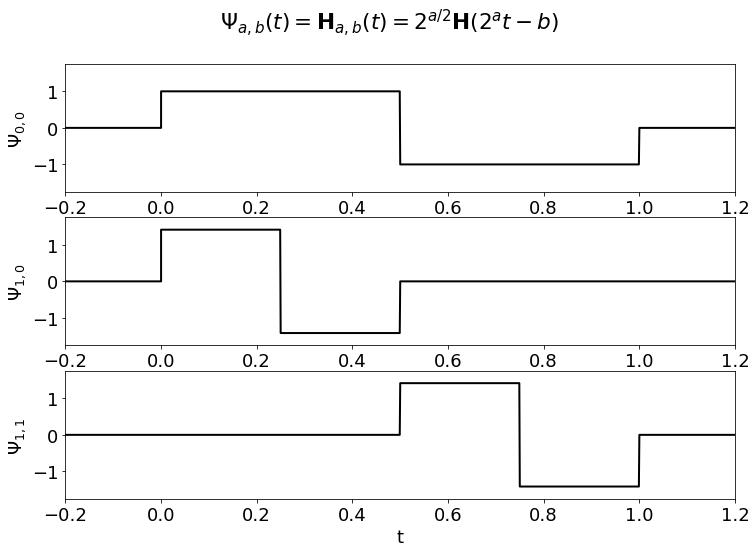

In [162]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})


x = np.arange(0,1,0.001)
n = len(x)
n2 = int(np.floor(n/2))
n4 = int(np.floor(n/4))

f10 = np.zeros_like(x) # returns an array of zeros in the shape of x
f10[:n2] = 1           # sets the first half to 1, the second half to -1
f10[n2:] = -1          # Which is to say: f10 is Mother Wavelet psi(0,0)

f21 = np.zeros_like(x) # psi(a = 1, b = 0)
f21[:n4] = 1
f21[n4:n2] = -1
f21 = f21 * np.sqrt(2) 

f22 = np.zeros_like(x) # psi{a = 1, b = 1}
f22[n2:(n2+n4)] = 1
f22[(n2+n4):] = -1
f22 = f22 * np.sqrt(2)

# x = np.concatenate((-1, 0, x, 1, 2))
x = np.append([-1,0],x)
x = np.append(x,[1,2])

f10 = np.pad(f10, (2, 2), 'constant')
f21 = np.pad(f21, (2, 2), 'constant')
f22 = np.pad(f22, (2, 2), 'constant')

fig,axs = plt.subplots(3,1)
axs[0].plot(x,f10,color='k',LineWidth=2)
axs[0].set_xlim(-0.2,1.2)
axs[0].set_ylim(-1.75,1.75)
axs[0].set_ylabel(r"$\Psi_{0,0}$")
axs[1].plot(x,f21,color='k',LineWidth=2)
axs[1].set_xlim(-0.2,1.2)
axs[1].set_ylim(-1.75,1.75)
axs[1].set_ylabel(r"$\Psi_{1,0}$")
axs[2].plot(x,f22,color='k',LineWidth=2)
axs[2].set_xlim(-0.2,1.2)
axs[2].set_ylim(-1.75,1.75)
axs[2].set_ylabel(r"$\Psi_{1,1}$")
axs[2].set_xlabel("t")
fig.suptitle(r"$\Psi_{a,b}(t) = \mathbf{H}_{a,b}(t)= 2^{a/2}\mathbf{H} (2^a t - b)$")
plt.show()

<ipython-input-167-266eaa3101eb>:3: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



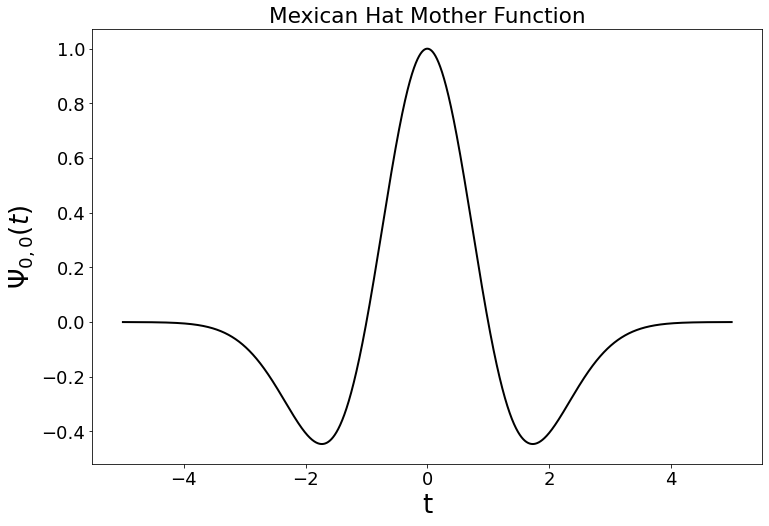

In [167]:
x = np.arange(-5,5,0.001)
fMexHat = (1-np.power(x,2)) * np.exp(-np.power(x,2)/2)
plt.plot(x,fMexHat,color='k',LineWidth=2)
plt.title("Mexican Hat Mother Function")
plt.ylabel(r"$\Psi_{0,0}(t)$", fontsize = 26)
plt.xlabel("t", fontsize = 26)
plt.show()

# Using Haar wavelets?

In [163]:
# Nice enough! Let's try using it
import pywt
w = pywt.Wavelet('haar')
print(w)

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [164]:
thisLevel = 1
(phi, psi, xgrid) = w.wavefun(level=thisLevel)
print("Scaling function: " + str(phi)) # scaling function
print("Wavelet function: " + str(psi)) # wavelet function
print("x coordinates: " + str(xgrid)) # xgrid coordinates

Scaling function: [0. 1. 1. 0.]
Wavelet function: [ 0.  1. -1.  0.]
x coordinates: [0.  0.5 1.  1.5]


In [165]:
#sample = [0,0]
#sample = [1,-1]
sample = [0, 1, -1, 0]
#sample = [ 0,  1,  1, -1, -1,  0]
cA, cD = pywt.dwt(sample, 'haar')
print("Approximation coefficients: " + str(cA))
print("Detail coefficients: " + str(cD))

Approximation coefficients: [ 0.70710678 -0.70710678]
Detail coefficients: [-0.70710678 -0.70710678]


In [166]:
reSample = pywt.idwt(cA,cD, 'haar')
print("Reconstructed sample: " + str(reSample))

Reconstructed sample: [ 0.  1. -1.  0.]


Text(0, 0.5, '$\\Psi_{0,0}$')

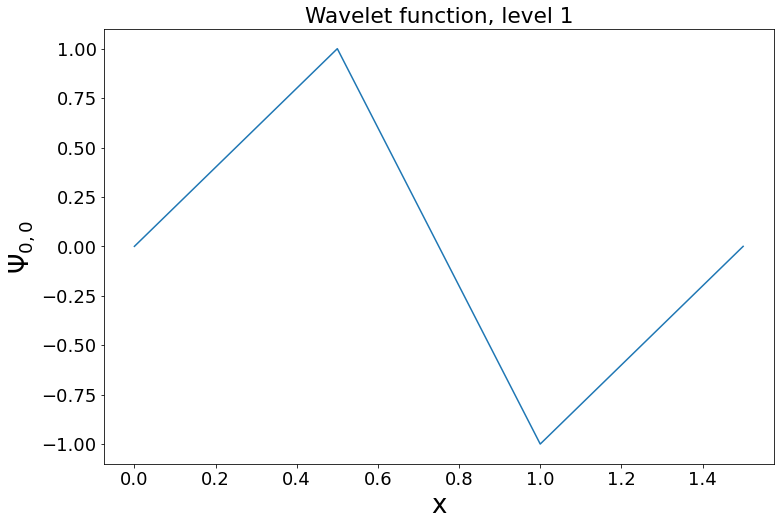

In [168]:
plt.plot(xgrid,psi)
plt.title("Wavelet function, level " + str(thisLevel))
plt.xlabel('x', fontsize = 26); plt.ylabel(r"$\Psi_{0,0}$", fontsize = 26)

In [169]:
# get audio sample as array of discrete points
# sr: sampling rate
import librosa
audio_path = '../Evil_Laugh.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(125547,) 22050


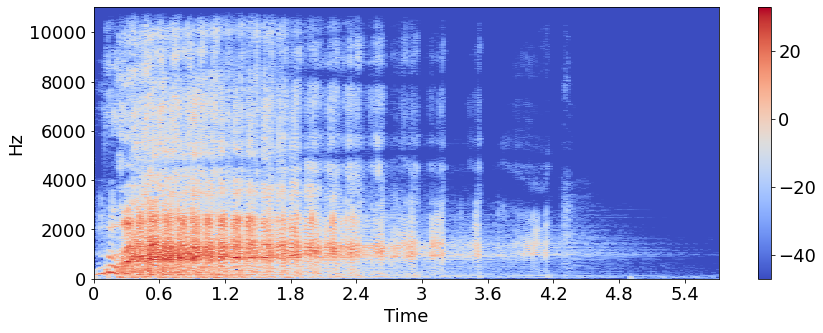

In [170]:
# Spectrogram! 
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

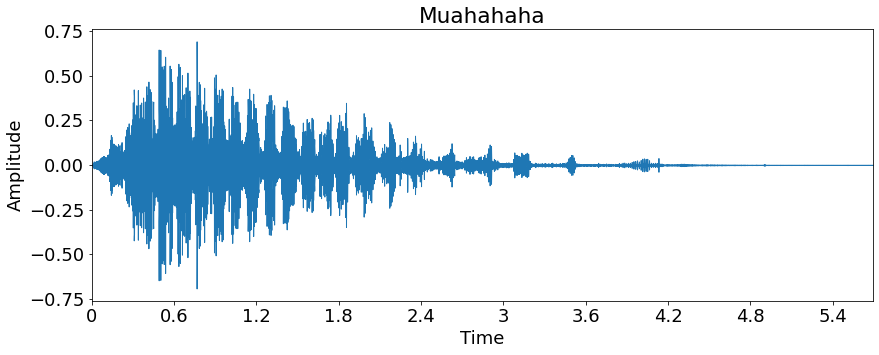

In [171]:
# But more importantly: waveform
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import soundfile as sf
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.ylabel('Amplitude')
plt.title('Muahahaha')
ipd.Audio(audio_path)

NameError: name 'ylabel' is not defined

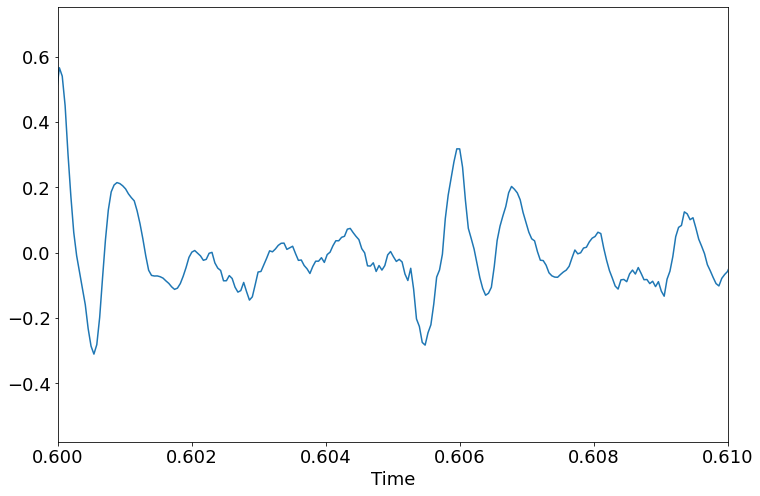

In [172]:
# Reminder: waveforms are just lovely little functions
import numpy as np
time = np.linspace(0,5.4,num = len(x))
plt.plot(time, x)
plt.xlim(.6,.61)
plt.xlabel('Time'); ylabel('Amplitude')
plt.title('Muahahaha, zoomed in')

In [173]:
# displays waveform; returns approximation array
# for a haar decomposition of x with n levels.
# saves approximation coefficient array as EvilHaarSample.wav
# n = 0 returns the original.

def haarSampler(x,n):

    coeffs = pywt.wavedec(x,wavelet='haar', level = n)    
    xSample, coeff_slices = pywt.coeffs_to_array(coeffs)
    
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(xSample, sr=sr)
    plt.ylabel('Amplitude')
    plt.title('Muahaha, Haar wavelet ' + str(n) + ' levels')
    sf.write('EvilHaarSample.wav', data = xSample, samplerate = sr, subtype='PCM_24')
    return xSample

Text(0.5, 1.0, 'Muahahaha approximation function, zoomed in')

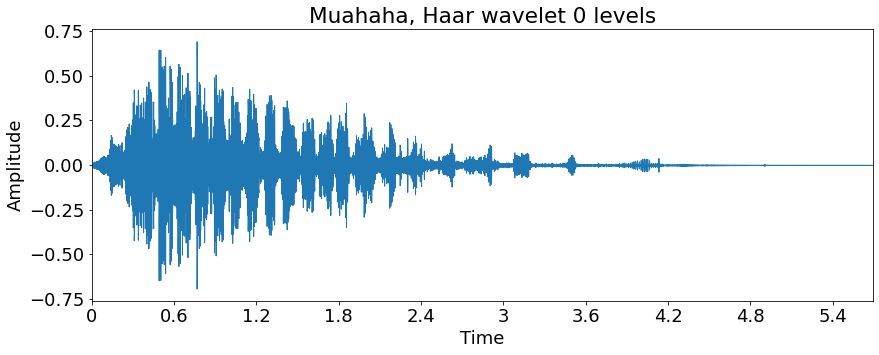

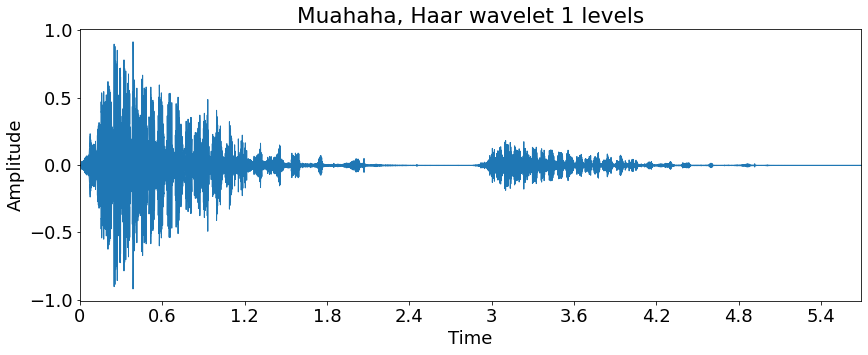

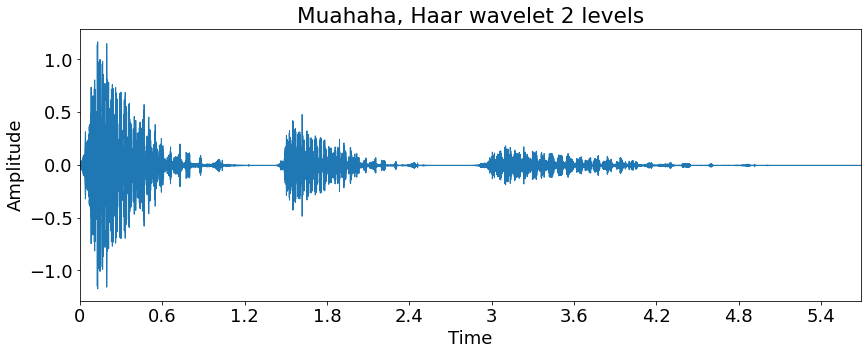

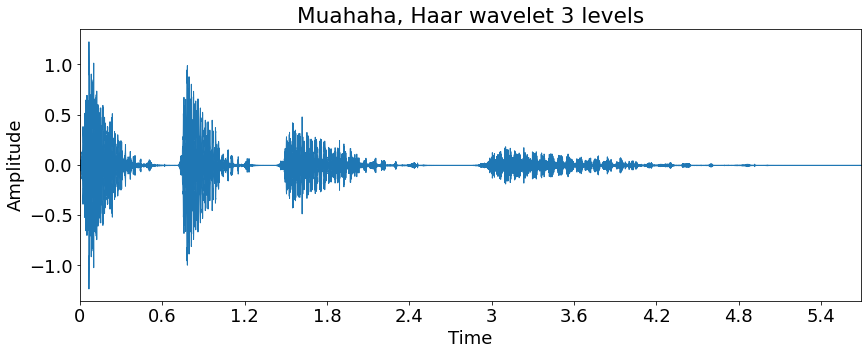

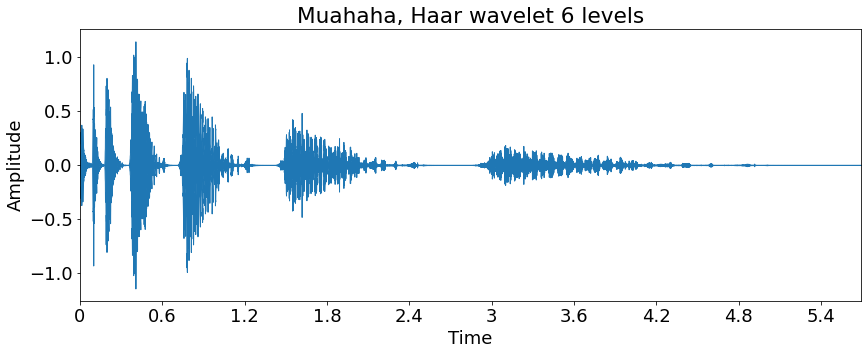

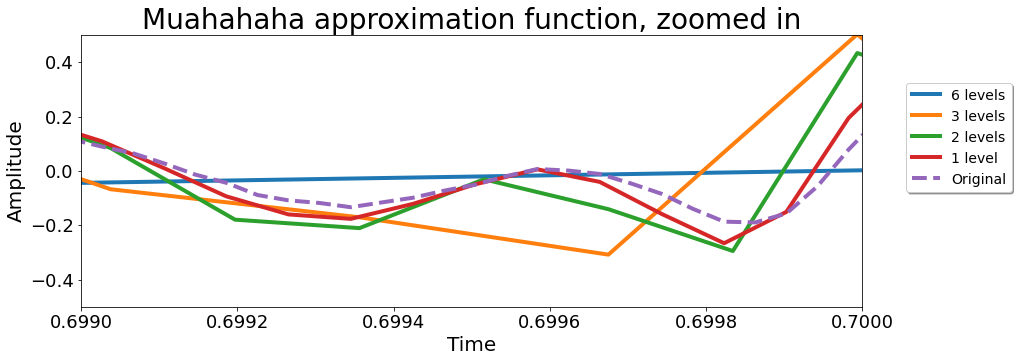

In [174]:
# compare approximation function for different levels
import matplotlib.pyplot as plt
import numpy as np
import math

sample = haarSampler(x,0)
sample1 = haarSampler(x,1)
sample2 = haarSampler(x,2)
sample3 = haarSampler(x,3)
sample6 = haarSampler(x,6)


lw = 4
plt.figure(figsize=(14, 5))
time = np.linspace(0,5,num = math.ceil(len(sample6)/2**6))
plt.plot(time, sample6[:len(time)], label = '6 levels', linewidth = lw)
time = np.linspace(0,5,num = math.ceil(len(sample3)/2**3))
plt.plot(time,sample3[:len(time)], label = "3 levels", linewidth = lw)
time = np.linspace(0,5,num = math.ceil(len(sample2)/2**2))
plt.plot(time,sample2[:len(time)], label = "2 levels", linewidth = lw)
time = np.linspace(0,5,num = math.ceil(len(sample1)/2))
plt.plot(time, sample1[:len(time)], label = "1 level", linewidth = lw)
time = np.linspace(0,5,num = len(sample))
plt.plot(time, sample,'--', label = "Original", linewidth = lw)

plt.xlim(.699,.7)
plt.ylim(-.5,.5)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.85),shadow=True,fontsize = 14)
plt.title('Muahahaha approximation function, zoomed in', fontsize = 28)

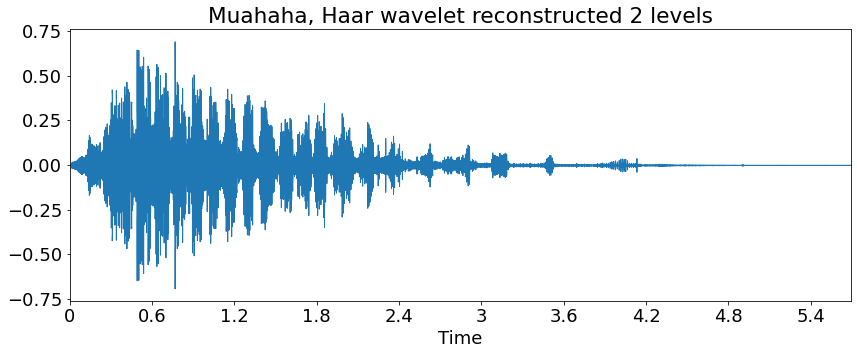

In [175]:
n=2
coeffs = pywt.wavedec(x,wavelet='haar', level = n)  
rec = pywt.waverec(coeffs, 'haar')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(rec, sr=sr)
plt.title('Muahaha, Haar wavelet reconstructed ' + str(n) + ' levels')
sf.write('EvilHaarSampleRec.wav', data = rec, samplerate = sr, subtype='PCM_24')

ipd.Audio('EvilHaarSampleRec.wav')

In [ ]:
n = 0
sample2 = haarSampler(x,n)
ipd.Audio('EvilHaarSample.wav')

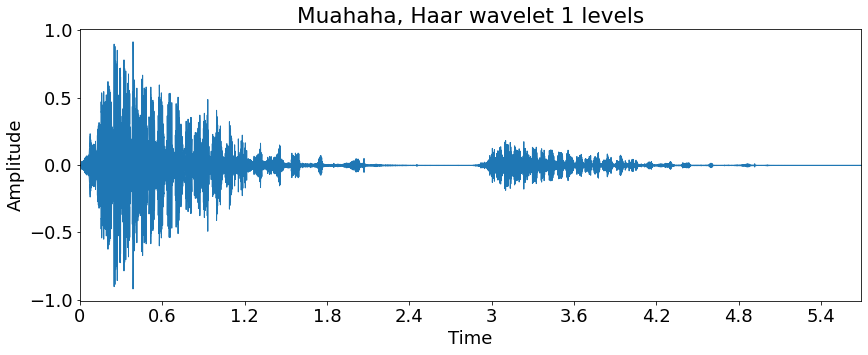

In [176]:
n = 1
sample2 = haarSampler(x,n)
ipd.Audio('EvilHaarSample.wav')

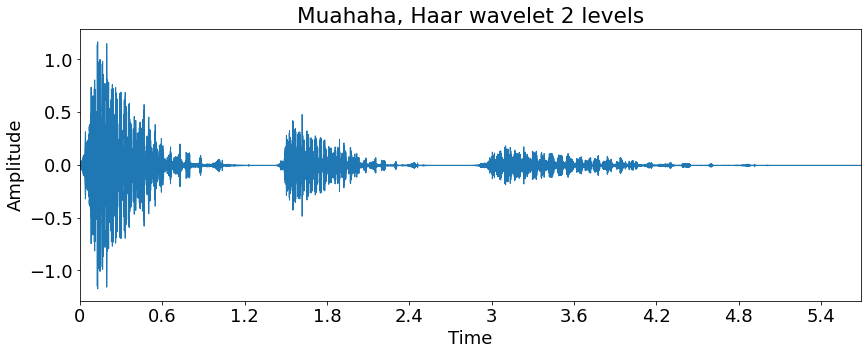

In [177]:
n = 2
sample2 = haarSampler(x,n)
ipd.Audio('EvilHaarSample.wav')

In [ ]:
n = 3
sample3 = haarSampler(x,n)
ipd.Audio('EvilHaarSample.wav')

In [ ]:
n = 6
sample6 = haarSampler(x,n)
ipd.Audio('EvilHaarSample.wav')

# How well does compression work?

In [ ]:
def compressHaar(x,n,keep):  
    
    coeffs = pywt.wavedec(x,wavelet='haar', level = n)
    coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

    Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

    
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    #print("coeff_arr: " + str(coeff_arr))
    ind = np.abs(coeff_arr) > thresh
    #print("ind: "+ str(ind))
    Cfilt = coeff_arr * ind # Threshold small indices: changes values at these indices to 0
    #print("Cfilt: " + str(Cfilt))
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec')
    rec = pywt.waverec(coeffs_filt,wavelet='haar')
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(rec, sr=sr)
    plt.title('Muahaha, Haar wavelet reconstructed ' + str(n) + ' levels; fraction kept = ' + str(keep))
    sf.write('EvilHaarSampleRec.wav', data = rec, samplerate = sr, subtype='PCM_24')

    return rec


In [ ]:
# zoom in on reconstructed compressed versions
n = 2
rec_50 = compressHaar(x,n,.5)
rec_25 = compressHaar(x,n,.25)
rec_05 = compressHaar(x,n,.05)
rec_01 = compressHaar(x,n,.01)
rec_1 = compressHaar(x,n,1)
lw = 4
plt.figure(figsize=(14, 5))
time = np.linspace(0,5,num = len(rec_50))
plt.plot(time, rec_50, label = '50% kept', linewidth = lw)
time = np.linspace(0,5,num = len(rec_25))
plt.plot(time,rec_25, label = "25% kept", linewidth = lw)
time = np.linspace(0,5,num = len(rec_05))
plt.plot(time, rec_05, label = "5% kept", linewidth = lw)
time = np.linspace(0,5,num = len(rec_01))
plt.plot(time, rec_01, label = "1% kept", linewidth = lw)
time = np.linspace(0,5,num = len(rec_1))
plt.plot(time, rec_1,'--', label = "original", linewidth = lw)

plt.xlim(.7995,.8)
plt.ylim(-.5,.5)
plt.xlabel('Time', fontsize = 20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.85),shadow=True,fontsize = 14)
plt.title('Reconstructed Muahahaha at 2 levels, zoomed in', fontsize = 28)

In [ ]:
compressHaar(x,2,.05)
ipd.Audio('EvilHaarSampleRec.wav')